In [ ]:
%load_ext autoreload
%autoreload 2
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
import pickle
import glob
import os

In [6]:
import pandas as pd
import altair as alt

alt.__version__

In [3]:
param_names = {
    'pca': 'Principal Components',
    'diffusion': 'Diffusion Time',
    'autoencoder': 'Bottleneck Width'
}

In [16]:
results = {}
result_files = glob.glob('../../results/*.pickle')
for file in result_files:
    results[os.path.basename(file).split('.')[0]] = pickle.load(open(file, 'rb'))

In [17]:
results.keys()

dict_keys(['sim_diffusion_poisson', 'hca_diffusion_mse', 'paul_autoencoder_mse', 'neuron_diffusion_mse', 'sim_autoencoder_poisson', 'neuron_autoencoder_pois', 'neuron_pca_mse', 'hca_diffusion_poisson', 'paul_noise2self_autoencoder_mse', 'sim_pca_mse', 'paul_noise2self_autoencoder_poisson', 'paul_autoencoder_poisson', 'sim_autoencoder_mse', 'hca_autoencoder_mse', 'hca_autoencoder_poisson', 'sim_noise2self_autoencoder_mse', 'hca_pca_mse', 'sim_noise2self_autoencoder_poisson', 'sim_diffusion_mse', 'neuron_autoencoder_mse'])

In [32]:
pca_df = pd.DataFrame(results['neuron_pca_mse'])
diffusion_df = pd.DataFrame(results['neuron_diffusion_mse'])
autoencoder_df = pd.DataFrame(results['neuron_autoencoder_mse'])

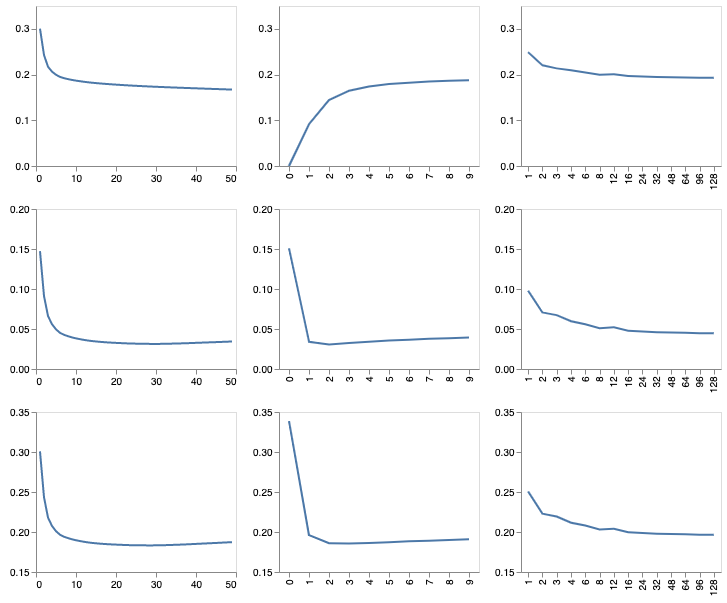

In [35]:

cs = [
    alt.Chart(df).properties(width=200, height=160).encode(x=alt.X(f'param_range:{t}', title=None))
    for df,t in zip((pca_df, diffusion_df, autoencoder_df), 'QNN')
]

yscales = [
    alt.Scale(domain=(0., 0.35), nice=False),
    alt.Scale(domain=(0.0, 0.20), nice=False),
    alt.Scale(domain=(0.15, 0.35), nice=False),
]

alt.vconcat(
    *(
        alt.hconcat(
            *(
                c.mark_line().encode(
                    y=alt.Y(f'{y_var}:Q', title=None, scale=ys)
                )
                for c,t in zip(cs, 'QNN')
            )
        ).resolve_scale(
            y='shared'
        )
        for y_var,ys in zip(('re_loss', 'gt_loss', 'ss_loss'), yscales)
    )
# ).resolve_scale(
#     y='shared'
).configure_axis(grid=False).properties(background='white')

In [19]:
pca_df = pd.DataFrame(results['sim_pca_mse'])
diffusion_df = pd.DataFrame(results['sim_diffusion_mse'])
autoencoder_df = pd.DataFrame(results['sim_autoencoder_mse'])

In [23]:
diffusion_df.columns

Index(['dataset', 'method', 'loss', 'normalization', 'param_range', 're_loss',
       'ss_loss', 'gt_loss'],
      dtype='object')

In [24]:
diffusion_df[diffusion_df['param_range'] > 0]

,dataset,method,loss,normalization,param_range,re_loss,ss_loss,gt_loss
1,sim,diffusion,mse,sqrt,1,0.092048,0.218035,0.029134
2,sim,diffusion,mse,sqrt,2,0.145748,0.199938,0.011179
3,sim,diffusion,mse,sqrt,3,0.169137,0.196523,0.007805
4,sim,diffusion,mse,sqrt,4,0.180586,0.196083,0.007378
5,sim,diffusion,mse,sqrt,5,0.186845,0.196418,0.007717
6,sim,diffusion,mse,sqrt,6,0.190603,0.196962,0.008262
7,sim,diffusion,mse,sqrt,7,0.193049,0.197544,0.008845
8,sim,diffusion,mse,sqrt,8,0.194759,0.198112,0.009413
9,sim,diffusion,mse,sqrt,9,0.196029,0.198648,0.009949
10,sim,diffusion,mse,sqrt,10,0.197024,0.199149,0.010451


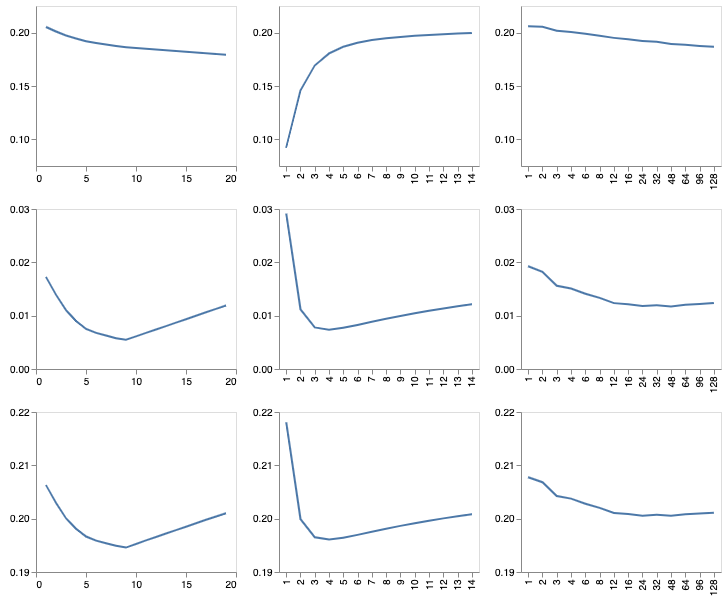

In [31]:

cs = [
    alt.Chart(df).properties(width=200, height=160).encode(x=alt.X(f'param_range:{t}', title=None))
    for df,t in zip((pca_df, diffusion_df[diffusion_df['param_range'] > 0], autoencoder_df), 'QNN')
]

yscales = [
    alt.Scale(domain=(0.075, 0.225), nice=False),
    alt.Scale(domain=(0.0, 0.03), nice=False),
    alt.Scale(domain=(0.19, 0.22), nice=False),
]

alt.vconcat(
    *(
        alt.hconcat(
            *(
                c.mark_line().encode(
                    y=alt.Y(f'{y_var}:Q', title=None, scale=ys)
                )
                for c,t in zip(cs, 'QNN')
            )
        ).resolve_scale(
            y='shared'
        )
        for y_var,ys in zip(('re_loss', 'gt_loss', 'ss_loss'), yscales)
    )
# ).resolve_scale(
#     y='shared'
).configure_axis(grid=False).properties(background='white')

# Simulated

In [ ]:
sim_pca_mse = results['sim_pca_mse']
sim_diffusion_mse = results['sim_diffusion_mse']
sim_autoencoder_mse = results['sim_autoencoder_mse']

sim_diffusion_mse['param_min'] = 2
sim_autoencoder_mse['param_max'] = -3

plot_results([sim_pca_mse, sim_diffusion_mse, sim_autoencoder_mse])
plt.savefig('figures/sim_mse.svg')

# Poisson Loss

In [ ]:
sim_diffusion_p = results['sim_diffusion_poisson']
sim_autoencoder_p = results['sim_autoencoder_poisson']

sim_diffusion_p['param_min'] = 2
sim_autoencoder_p['param_max'] = -3

plot_results([sim_diffusion_p, sim_autoencoder_p])
plt.savefig('figures/sim_poisson.svg')